# CA Assignment 1

#### CS22B2012 and CS22B2014

### Lesser number of temporal instructions

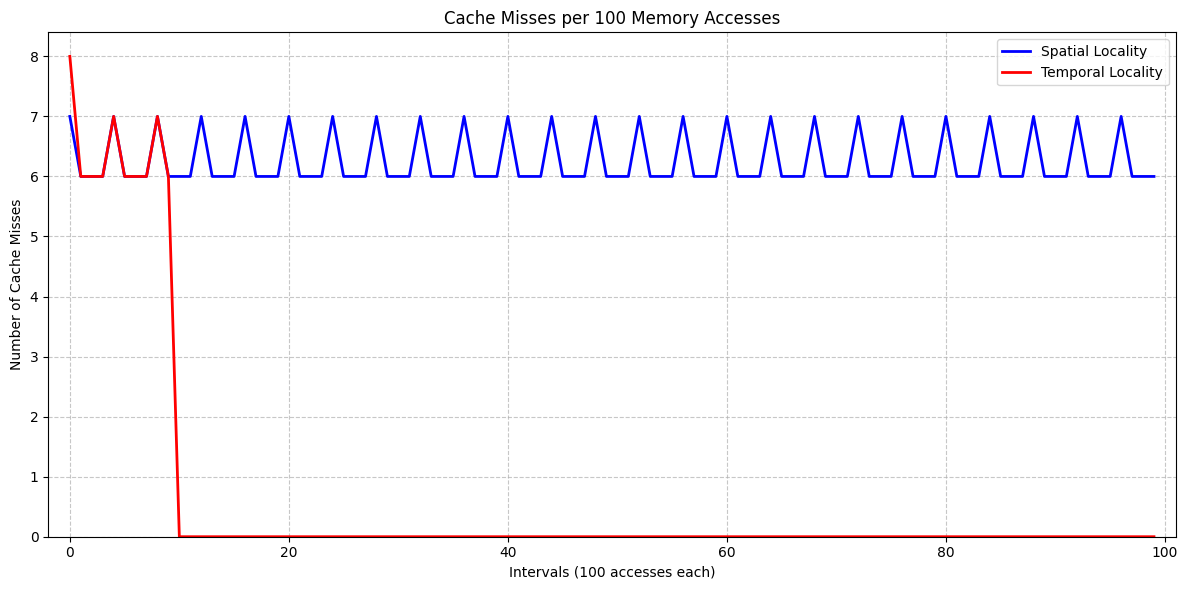

In [5]:
import random
import matplotlib.pyplot as plt
import numpy as np

class CacheSimulator:
    def __init__(self):
        self.main_memory_size = 64 * 1024
        self.cache_size = 2 * 1024
        self.block_size = 16
        self.word_size = 32
        self.address_size = 16
        
        # Initialize main memory
        self.main_memory = []
        for i in range(self.main_memory_size):
            address = format(i, f'0{self.address_size}b')
            data = format(random.randint(0, 2**self.word_size - 1), f'0{self.word_size}b')
            self.main_memory.append((address, data))
        
        # Initialize cache
        self.cache_blocks = self.cache_size // self.block_size
        self.reset_cache()
        
    def reset_cache(self):
        self.cache = [{"valid": 0, "dirty": 0, "tag": None, "data": "", "lru": 0} 
                     for _ in range(self.cache_blocks)]
        self.misses = 0
        self.accesses = 0
        self.replacements = 0
        self.misses_per_interval = []
        self.interval_misses = 0
        
    def accessing_cache(self, instruction):
        self.accesses += 1
        tag = instruction[:-int(self.block_size ** 0.5)]
        word = instruction[-int(self.block_size ** 0.5):]
        
        # Update LRU counters
        for i in range(len(self.cache)):
            self.cache[i]['lru'] += 1
        
        # Check cache hit
        for i in range(len(self.cache)):
            if self.cache[i]['tag'] == tag and self.cache[i]['valid'] == 1:
                self.cache[i]['lru'] = 0
                return True
        
        # Handle cache miss
        self.misses += 1
        self.interval_misses += 1
        
        # Find empty block
        for i in range(len(self.cache)):
            if self.cache[i]['valid'] == 0:
                self._handle_cache_miss(i, tag)
                return False
        
        # Handle replacement
        self.replacements += 1
        max_lru = max(block['lru'] for block in self.cache)
        for i in range(len(self.cache)):
            if self.cache[i]['lru'] == max_lru:
                self._handle_cache_miss(i, tag)
                return False
    
    def _handle_cache_miss(self, index, tag):
        self.cache[index]['valid'] = 1
        self.cache[index]['tag'] = tag
        self.cache[index]['data'] = ""
        self.cache[index]['lru'] = 0
        
        x = tag + '0'*int(self.block_size ** 0.5)
        for j in range(self.block_size):
            y = int(x,2) + j
            self.cache[index]['data'] += str(self.main_memory[y][1])
    
    def simulate_spatial_locality(self, num_accesses=64500):
        self.reset_cache()
        instruction_address = format(0, f'0{self.address_size}b')
        
        for i in range(num_accesses):
            self.accessing_cache(instruction_address)
            if (i + 1) % 100 == 0:
                self.misses_per_interval.append(self.interval_misses)
                self.interval_misses = 0
            d = (int(instruction_address, 2) + 1) % self.main_memory_size
            instruction_address = format(d, f'0{self.address_size}b')
        
        return self.misses_per_interval
    
    def simulate_temporal_locality(self, num_iterations=20):
        self.reset_cache()
        pattern_size = 1000
        pattern_start = random.randint(0, self.main_memory_size - pattern_size)
        
        # Create access pattern
        pattern = list(range(pattern_start, pattern_start + pattern_size))
        
        for _ in range(num_iterations):
            for addr in pattern:
                self.accessing_cache(format(addr, f'0{self.address_size}b'))
                if self.accesses % 100 == 0:
                    self.misses_per_interval.append(self.interval_misses)
                    self.interval_misses = 0
        
        return self.misses_per_interval

def plot_miss_comparison():
    simulator = CacheSimulator()
    
    # Simulate spatial locality
    spatial_misses = simulator.simulate_spatial_locality(10000)
    
    # Reset simulator and simulate temporal locality
    temporal_misses = simulator.simulate_temporal_locality()
    
    # Ensure both arrays have the same length for plotting
    min_len = min(len(spatial_misses), len(temporal_misses))
    spatial_misses = spatial_misses[:min_len]
    temporal_misses = temporal_misses[:min_len]
    
    plt.figure(figsize=(12, 6))
    
    # Create x-axis values
    x = np.arange(len(spatial_misses))
    
    # Plot with better styling
    plt.plot(x, spatial_misses, 'b-', label='Spatial Locality', linewidth=2)
    plt.plot(x, temporal_misses, 'r-', label='Temporal Locality', linewidth=2)
    
    plt.xlabel('Intervals (100 accesses each)')
    plt.ylabel('Number of Cache Misses')
    plt.title('Cache Misses per 100 Memory Accesses')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Set y-axis to start from 0
    plt.ylim(bottom=0)
    
    # Add some padding around the plot
    plt.margins(x=0.02)
    
    plt.tight_layout()
    plt.show()

# Run the simulation
plot_miss_comparison()

### Greater number of temporal instructions

[33795, 33796, 33797, 33798, 33799, 33800, 33801, 33802, 33803, 33804]
Total misses with spatial locality: 625
Total misses with temporal locality: 25800


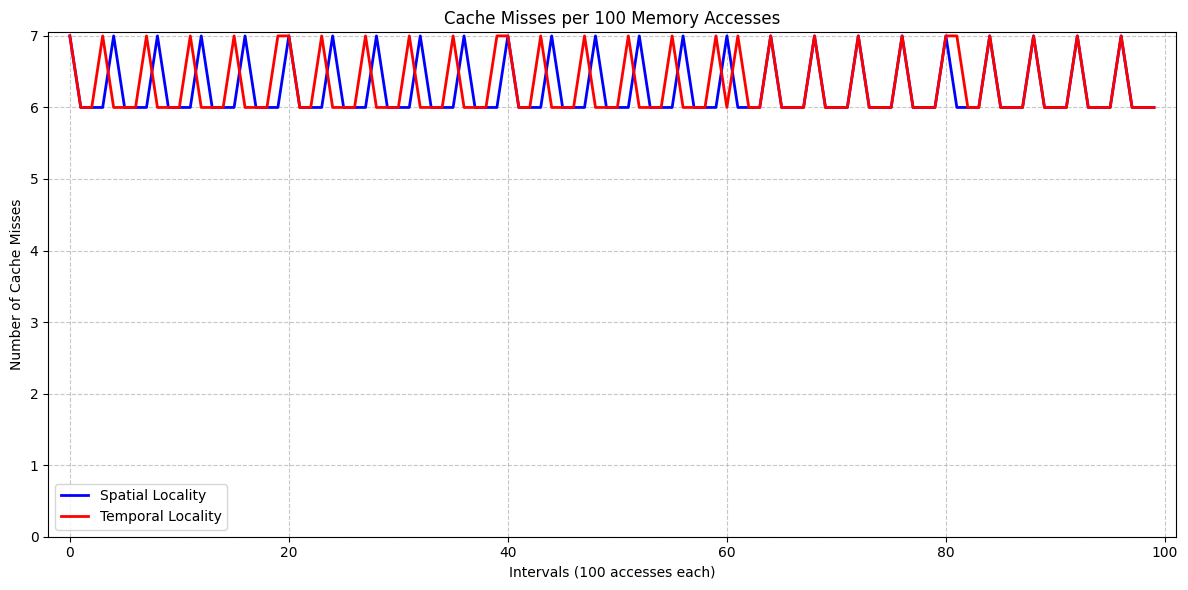

In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np

class CacheSimulator:
    def __init__(self):
        self.main_memory_size = 64 * 1024
        self.cache_size = 2 * 1024
        self.block_size = 16
        self.word_size = 32
        self.address_size = 16
        
        # Initialize main memory
        self.main_memory = []
        for i in range(self.main_memory_size):
            address = format(i, f'0{self.address_size}b')
            data = format(random.randint(0, 2**self.word_size - 1), f'0{self.word_size}b')
            self.main_memory.append((address, data))
        
        # Initialize cache
        self.cache_blocks = self.cache_size // self.block_size
        self.reset_cache()
        
    def reset_cache(self):
        self.cache = [{"valid": 0, "dirty": 0, "tag": None, "data": "", "lru": 0} 
                     for _ in range(self.cache_blocks)]
        self.misses = 0
        self.accesses = 0
        self.replacements = 0
        self.misses_per_interval = []
        self.interval_misses = 0
        
    def accessing_cache(self, instruction):
        self.accesses += 1
        tag = instruction[:-int(self.block_size ** 0.5)]
        word = instruction[-int(self.block_size ** 0.5):]
        
        # Update LRU counters
        for i in range(len(self.cache)):
            self.cache[i]['lru'] += 1
        
        # Check cache hit
        for i in range(len(self.cache)):
            if self.cache[i]['tag'] == tag and self.cache[i]['valid'] == 1:
                self.cache[i]['lru'] = 0
                return True
        
        # Handle cache miss
        self.misses += 1
        self.interval_misses += 1
        
        # Find empty block
        for i in range(len(self.cache)):
            if self.cache[i]['valid'] == 0:
                self._handle_cache_miss(i, tag)
                return False
        
        # Handle replacement
        self.replacements += 1
        max_lru = max(block['lru'] for block in self.cache)
        for i in range(len(self.cache)):
            if self.cache[i]['lru'] == max_lru:
                self._handle_cache_miss(i, tag)
                return False
    
    def _handle_cache_miss(self, index, tag):
        self.cache[index]['valid'] = 1
        self.cache[index]['tag'] = tag
        self.cache[index]['data'] = ""
        self.cache[index]['lru'] = 0
        
        x = tag + '0'*int(self.block_size ** 0.5)
        for j in range(self.block_size):
            y = int(x,2) + j
            self.cache[index]['data'] += str(self.main_memory[y][1])
    
    def simulate_spatial_locality(self, num_accesses=64500):
        self.reset_cache()
        instruction_address = format(0, f'0{self.address_size}b')
        
        for i in range(num_accesses):
            self.accessing_cache(instruction_address)
            if (i + 1) % 100 == 0:
                self.misses_per_interval.append(self.interval_misses)
                self.interval_misses = 0
            d = (int(instruction_address, 2) + 1) % self.main_memory_size
            instruction_address = format(d, f'0{self.address_size}b')
        
        return self.misses_per_interval, self.misses
    
    def simulate_temporal_locality(self, num_iterations=200):
        self.reset_cache()
        pattern_size = 2049
        pattern_start = random.randint(0, self.main_memory_size - pattern_size)
        
        # Create access pattern
        pattern = list(range(pattern_start, pattern_start + pattern_size))
        print(pattern[:10])
        
        for _ in range(num_iterations):
            for addr in pattern:
                self.accessing_cache(format(addr, f'0{self.address_size}b'))
                if self.accesses % 100 == 0:
                    self.misses_per_interval.append(self.interval_misses)
                    self.interval_misses = 0
        
        return self.misses_per_interval, self.misses

def plot_miss_comparison():
    simulator = CacheSimulator()
    
    # Simulate spatial locality
    spatial_misses, total_spatial_misses = simulator.simulate_spatial_locality(10000)
    
    # Reset simulator and simulate temporal locality
    temporal_misses, total_temporal_misses = simulator.simulate_temporal_locality()
    
    # Print total misses for each type
    print(f"Total misses with spatial locality: {total_spatial_misses}")
    print(f"Total misses with temporal locality: {total_temporal_misses}")
    
    # Ensure both arrays have the same length for plotting
    min_len = min(len(spatial_misses), len(temporal_misses))
    spatial_misses = spatial_misses[:min_len]
    temporal_misses = temporal_misses[:min_len]
    
    plt.figure(figsize=(12, 6))
    
    # Create x-axis values
    x = np.arange(len(spatial_misses))
    
    # Plot with better styling
    plt.plot(x, spatial_misses, 'b-', label='Spatial Locality', linewidth=2)
    plt.plot(x, temporal_misses, 'r-', label='Temporal Locality', linewidth=2)
    
    plt.xlabel('Intervals (100 accesses each)')
    plt.ylabel('Number of Cache Misses')
    plt.title('Cache Misses per 100 Memory Accesses')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Set y-axis to start from 0
    plt.ylim(bottom=0)
    
    # Add some padding around the plot
    plt.margins(x=0.02)
    
    plt.tight_layout()
    plt.show()

# Run the simulation
plot_miss_comparison()